# Assignment 3

#### 1. Generate a figure from the given dataset that resembles Figure 1.

In [2]:
import pandas as pd

df = pd.read_csv("spiral-dataset.csv", delimiter='\t',header=None,names=['x','y','Class'])
df.head()

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [3]:
class_1_df = df.loc[df['Class'] == 1]
class_2_df = df.loc[df['Class'] == 2]
class_3_df = df.loc[df['Class'] == 3]
class_3_df

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
101,21.85,15.25,3
102,21.75,15.15,3
103,21.65,15.05,3
104,21.55,15.00,3


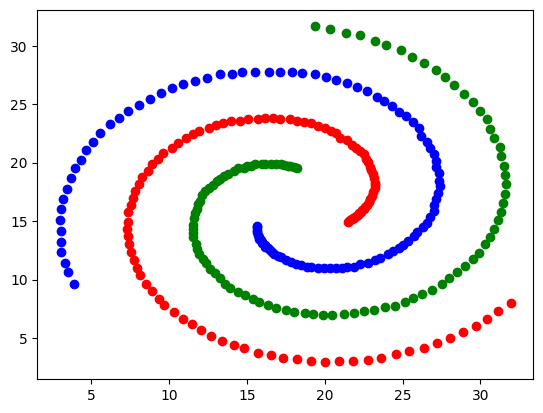

In [4]:
import matplotlib.pyplot as plt

plt.scatter(class_1_df['x'], class_1_df['y'], color='g')
plt.scatter(class_2_df['x'], class_2_df['y'], color='b')
plt.scatter(class_3_df['x'], class_3_df['y'], color='r')
plt.show()


#### 2. Implement the k-means clustering algorithm. And do the following:
**a)**
- Run your k-means algorithm on the given dataset setting the value k=3 (because
    visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids. 

In [5]:
# split into training and test set
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_train.head()

(249, 2) (249,)
(63, 2) (63,)


64     3
34     3
137    1
264    2
81     3
Name: Class, dtype: int64

In [6]:
import random
import numpy as np 

# Repeat steps 2 and 3 until the centroids no longer change significantly (i.e., convergence) or until a maximum number of iterations is reached.
def df_to_list():
    return list(X_train.values)

# Randomly select 3 centroids from the dataset
def choose_centroids(data, k):
    # choose random centroids
    return random.sample(data, k)  

# For each data point, calculate the Euclidean distance to each of the centroids, and assign the point to the nearest centroid’s cluster.
def assign_clusters(data,centroids):
    k = len(centroids)
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for point in data: 
        euclid_distance = []
        for i in range(k):
            euclid_distance.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
        clusters[euclid_distance.index(min(euclid_distance))].append(point)

    return clusters

# For each cluster, recalculate the centroid by finding the mean of all points assigned to that cluster.
def recalculate_centroids(clusters, data, k):
    new_centroids = []
    for i in range(k):
        if clusters[i]:  # Ensure the cluster is not empty
            new_centroids.append(np.mean(clusters[i], axis=0))
        else:
            # Reinitialize centroid with a random point from the data if the cluster is empty
            new_centroids.append(random.choice(data))
    return new_centroids

def k_means(k=3, max_iters=300, tol=1e-4):
    data = df_to_list()
    centroids = choose_centroids(data, k)
    
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = recalculate_centroids(clusters, data, k)
        
        # Check for convergence (if centroids do not change significantly)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    return centroids, clusters

centroids, clusters = k_means()
print("Centroids:", centroids)
print("Clusters:", clusters)

Centroids: [array([23.60320513, 21.84615385]), array([10.04878049, 17.12926829]), array([21.25617978,  9.93370787])]
Clusters: {0: [array([17.15, 23.75]), array([27.15, 16.9 ]), array([22.9 , 19.65]), array([29.95, 24.45]), array([31.15, 15.05]), array([22.9, 16.9]), array([21.  , 22.15]), array([27.35, 18.45]), array([26.6, 21.8]), array([23.05, 17.15]), array([22.  , 21.25]), array([19.35, 31.65]), array([23.95, 30.05]), array([31.6 , 17.35]), array([22.65, 20.35]), array([20.4, 22.7]), array([27.4, 18. ]), array([23.1, 19. ]), array([28.95, 25.85]), array([23.2 , 30.45]), array([21.75, 21.55]), array([22.25, 30.9 ]), array([18.55, 27.7 ]), array([15.7 , 23.75]), array([18.65, 23.5 ]), array([25.65, 23.45]), array([20.35, 31.45]), array([31.35, 20.55]), array([22.25, 21.  ]), array([27. , 15.9]), array([22.75, 20.05]), array([18.2 , 19.55]), array([23.2 , 18.05]), array([15.55, 27.75]), array([27.15, 20.15]), array([30.9, 22.1]), array([16.15, 23.85]), array([26.05, 23.  ]), array([3

In [7]:
training_set = pd.concat([X_train, y_train])
training_1 = training_set.loc[df['Class'] == 1]
training_2 = training_set.loc[df['Class'] == 2]
training_3 = training_set.loc[df['Class'] == 3]


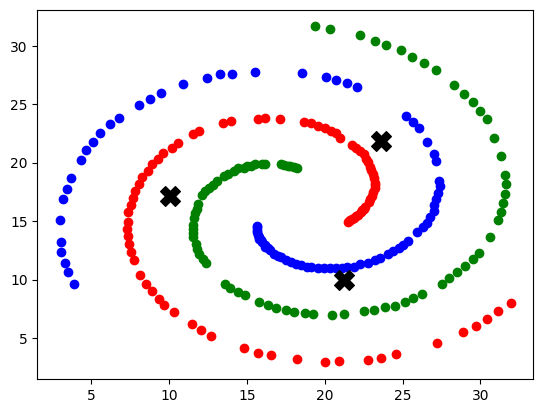

In [8]:
plt.scatter(training_1['x'], training_1['y'], color='g')
plt.scatter(training_2['x'], training_2['y'], color='b')
plt.scatter(training_3['x'], training_3['y'], color='r')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color="black", edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
plt.show()


**b)**
- Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better).

In [9]:
def calculate_SSE(clusters, centroids):
    sse = 0
    for i, cluster in clusters.items():
        for point in cluster:
            sse += np.linalg.norm(np.array(point) - np.array(centroids[i])) ** 2
    return sse

SSE = calculate_SSE(clusters,centroids)
print("SSE:", float(SSE))

SSE: 9322.163156546225


In [10]:

from sklearn.metrics import adjusted_rand_score
def calculate_RI(centroids):
    labels_pred = []
    for point in X_train.values:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_label = distances.index(min(distances))
        labels_pred.append(cluster_label)
    rand_index = adjusted_rand_score(y_train, labels_pred)
    return rand_index

RI = calculate_RI(centroids)
print("RI:", RI)

RI: 0.000564699107345398


**2c)**
    Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report out of the 10 runs of k-means what is the best SSE & RI you could get.

**2d)**
    Please draw the clustering results (like Figure 1).

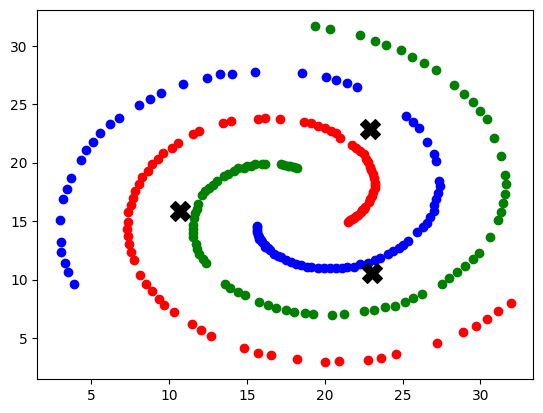

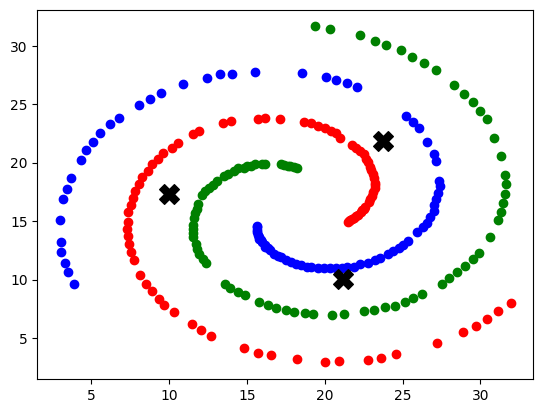

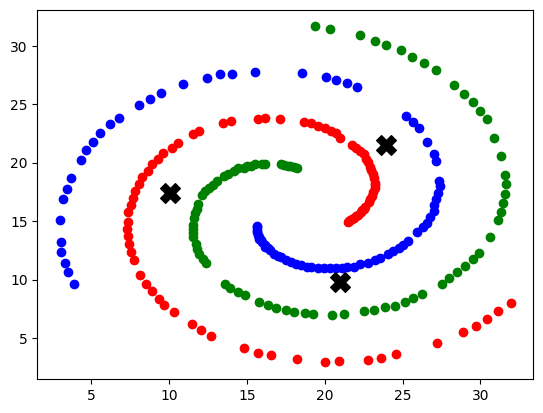

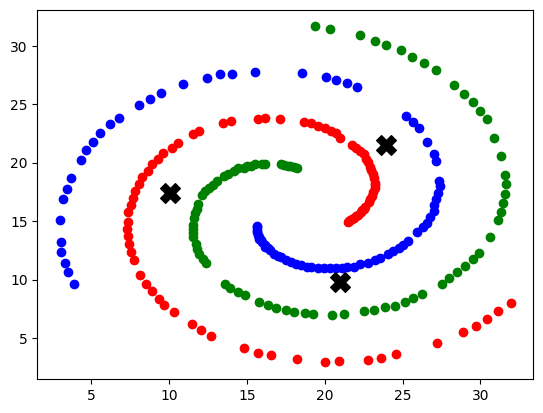

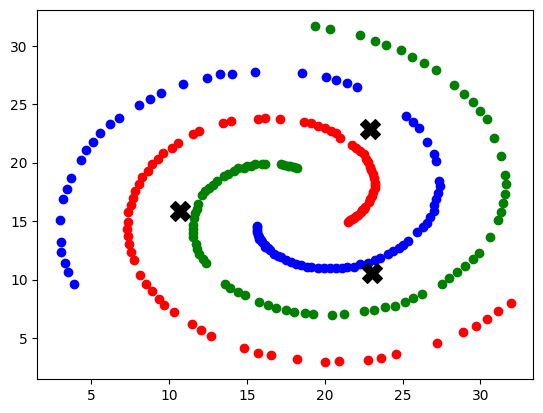

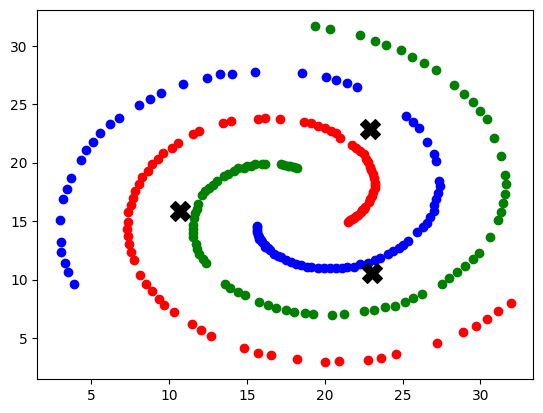

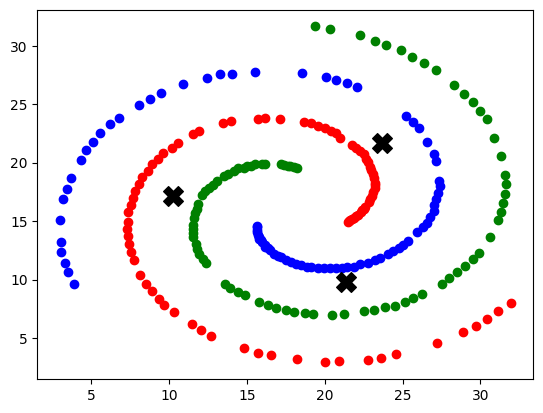

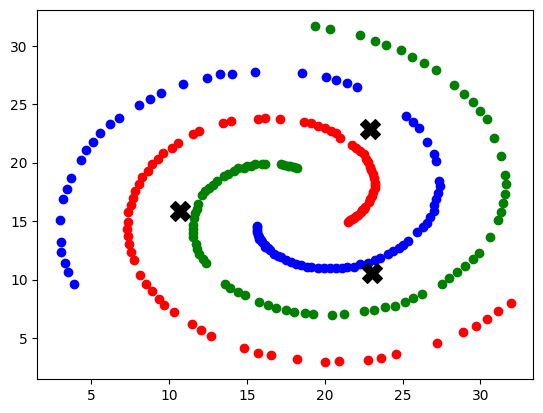

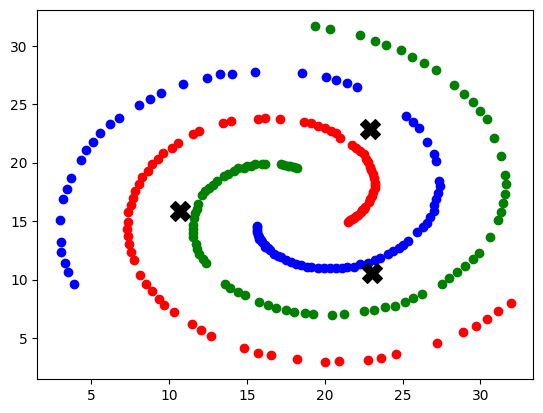

In [11]:
# second round
SSE = []
RI_arr = []

for rounds in range(9):
    centroids, clusters = k_means()
    
    sse = calculate_SSE(clusters, centroids)
    SSE.append(sse)

    ri = calculate_RI(centroids)
    RI_arr.append(ri)

    plt.scatter(training_1['x'], training_1['y'], color='g')
    plt.scatter(training_2['x'], training_2['y'], color='b')
    plt.scatter(training_3['x'], training_3['y'], color='r')
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color="black", edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
    plt.show()
    # centroids_dict[rounds] = centroids
    # clusters_arr.append(clusters)




In [12]:
print(min(SSE))
print(max(RI_arr))

9321.971500118145
0.0020218565358785376


Out of all 10 runs of k-means, the best SSE was `9326.454357850982`. As for the RI score the best was  `0.0020218565358785376`. From the RI score it can be said that the results of the centroids are not very accurate considering a score of 1 is the best. 

#### Implement the Hierarchical clustering algorithm

3.a) Using the “single linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.b) Using the “complete linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.c) Using the “average linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.d) Using the “centroid linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.



In [13]:
data = X_train.values
# Calculate matrix
proximity_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])

print(len(proximity_matrix))
print(len(data))
print(proximity_matrix)

249
249
[[ 0.         15.28275172 17.21982869 ... 11.50847514  9.1253767
  12.32203311]
 [15.28275172  0.         21.75005747 ... 25.38331145  8.23073508
   4.15992788]
 [17.21982869 21.75005747  0.         ... 14.89840596 22.13526598
  17.72286659]
 ...
 [11.50847514 25.38331145 14.89840596 ...  0.         20.54075218
  21.60676977]
 [ 9.1253767   8.23073508 22.13526598 ... 20.54075218  0.
   7.76208735]
 [12.32203311  4.15992788 17.72286659 ... 21.60676977  7.76208735
   0.        ]]


In [26]:

def single_linkage():
    data = X_train.values
    # 1. Let each data point be a cluster 
    clusters = {}
    for i,point in enumerate(data):
        clusters[i] = point

    # 2. Compute the proximity matrix 
    proximity_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            proximity_matrix[i, j] = np.linalg.norm(clusters[i] - clusters[j])


    # REPEAT
    #3. Merge the two closest clusters
    #   Update the proximity matric

    while len(proximity_matrix) > 3:
        cluster1 = 0
        cluster2 = 0
        # find the minimum distance value in the matrix
        min_value = np.min(proximity_matrix[np.nonzero(proximity_matrix)])
        for i in range(proximity_matrix.shape[0]):
            for j in range(proximity_matrix.shape[1]):
                if proximity_matrix[i][j] == min_value:
                    cluster1 = i
                    cluster2 = j
                    break
        
        # taking the two clusters get the entire row of both 
        for row in range(proximity_matrix.shape[0]):
            if row == cluster1:
                cluster1_row = proximity_matrix[row]
            if row == cluster2: 
                cluster2_row = proximity_matrix[row]

        min_clusters = [cluster1, cluster2]

        # get the remaining matrix, removing the min cluster rows and columns
        new_matrix = np.delete(proximity_matrix, min_clusters, axis=0)
        new_matrix = np.delete(new_matrix, min_clusters, axis=1)

        columns = np.vstack((cluster1_row, cluster2_row))
        new_columns = np.delete(columns.T, min_clusters, axis=0)

        # Determine new row for merged cluster
        new_array_row = []
        for row in new_columns:
            new_array_row.append(min(row[0], row[1]))
        new_array_row = np.array(new_array_row).reshape(1, new_matrix.shape[1])

        # Ensure new column consistency
        new_array_column = new_array_row.T
        result = np.append(new_array_column, [0]).reshape(-1, 1)

        appended = np.append(new_matrix, new_array_row, axis=0)
        proximity_matrix = np.append(appended, result, axis=1)

    
        

    return proximity_matrix

        

# UNTIL only k cluster remains 
single_linkage_matrix = single_linkage()
print(single_linkage_matrix)


[[0.         4.02647489 3.82099463]
 [4.02647489 0.         3.94588393]
 [3.82099463 3.94588393 0.        ]]


In [16]:
def calculate_sse(matrix):
    sse = 0
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):  # Only consider unique pairs
            sse += matrix[i][j] ** 2  # Sum the squared distances
    return sse

single_SSE = calculate_sse(single_linkage_matrix)
print(single_SSE)

46.38249999999998


In [17]:
def complete_linkage():
    data = X_train.values
    # 1. Let each data point be a cluster 
    clusters = {}
    for i,point in enumerate(data):
        clusters[i] = point

    # 2. Compute the proximity matrix 
    proximity_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            proximity_matrix[i, j] = np.linalg.norm(clusters[i] - clusters[j])


    # REPEAT
    #3. Merge the two closest clusters
    #   Update the proximity matric

    while len(proximity_matrix) > 3:
        cluster1 = 0
        cluster2 = 0
        # find the minimum distance value in the matrix
        max_value = np.max(proximity_matrix[np.nonzero(proximity_matrix)])
        for i in range(proximity_matrix.shape[0]):
            for j in range(proximity_matrix.shape[1]):
                if proximity_matrix[i][j] == max_value:
                    cluster1 = i
                    cluster2 = j
                    break
        
        # taking the two clusters get the entire row of both 
        for row in range(proximity_matrix.shape[0]):
            if row == cluster1:
                cluster1_row = proximity_matrix[row]
            if row == cluster2: 
                cluster2_row = proximity_matrix[row]

        min_clusters = [cluster1, cluster2]

        # get the remaining matrix, removing the min cluster rows and columns
        new_matrix = np.delete(proximity_matrix, min_clusters, axis=0)
        new_matrix = np.delete(new_matrix, min_clusters, axis=1)

        columns = np.vstack((cluster1_row, cluster2_row))
        new_columns = np.delete(columns.T, min_clusters, axis=0)

        # Determine new row for merged cluster
        new_array_row = []
        for row in new_columns:
            new_array_row.append(max(row[0], row[1]))
        new_array_row = np.array(new_array_row).reshape(1, new_matrix.shape[1])

        # Ensure new column consistency
        new_array_column = new_array_row.T
        result = np.append(new_array_column, [0]).reshape(-1, 1)

        appended = np.append(new_matrix, new_array_row, axis=0)
        proximity_matrix = np.append(appended, result, axis=1)

    
        

    return proximity_matrix

        

# UNTIL only k cluster remains 
complete_linkage_matrix = complete_linkage()
print(complete_linkage_matrix)

[[ 0.          0.1        17.66536159]
 [ 0.1         0.         17.75063379]
 [17.66536159 17.75063379  0.        ]]


In [18]:
complete_sse = calculate_sse(complete_linkage_matrix)
print(complete_sse)


627.1599999999999


In [19]:
import numpy as np

def average_linkage():
    data = X_train.values
    # 1. Let each data point be a cluster 
    clusters = {}
    for i,point in enumerate(data):
        clusters[i] = point

    # 2. Initialize the proximity matrix
    proximity_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            proximity_matrix[i, j] = np.linalg.norm(clusters[i] - clusters[j])

    # Track cluster IDs in relation to proximity matrix indices
    cluster_map = list(clusters.keys())

    while len(proximity_matrix) > 3:
        # 3. Find the two closest clusters
        min_value = np.min(proximity_matrix[np.nonzero(proximity_matrix)])
        cluster1, cluster2 = np.unravel_index(
            np.argmin(np.where(proximity_matrix > 0, proximity_matrix, np.inf)),
            proximity_matrix.shape
        )

        # Get real cluster IDs
        real_cluster1 = cluster_map[cluster1]
        real_cluster2 = cluster_map[cluster2]

        # Merge the two clusters
        new_cluster_id = max(clusters) + 1
        clusters[new_cluster_id] = np.vstack((clusters[real_cluster1], clusters[real_cluster2]))

        # Delete the old clusters
        del clusters[real_cluster1]
        del clusters[real_cluster2]

        # Update the cluster map
        cluster_map.pop(max(cluster1, cluster2))  # Remove larger index first to avoid shift issues
        cluster_map.pop(min(cluster1, cluster2))
        cluster_map.append(new_cluster_id)

        # 4. Update the proximity matrix for the new cluster
        new_matrix = np.delete(proximity_matrix, [cluster1, cluster2], axis=0)
        new_matrix = np.delete(new_matrix, [cluster1, cluster2], axis=1)

        # Calculate average linkage distances for new cluster
        new_distances = []
        for idx, cluster_id in enumerate(cluster_map[:-1]):
            avg_distance = np.mean([
                np.linalg.norm(point1 - point2)
                for point1 in clusters[new_cluster_id]
                for point2 in clusters[cluster_id]
            ])
            new_distances.append(avg_distance)

        new_distances = np.array(new_distances).reshape(-1, 1)
        new_matrix = np.append(new_matrix, new_distances, axis=1)
        new_matrix = np.append(new_matrix, np.append(new_distances.T, [[0]], axis=1), axis=0)

        proximity_matrix = new_matrix

    return proximity_matrix

# UNTIL only k cluster remains 
average_linkage_matrix = average_linkage()
print(average_linkage_matrix)

[[ 0.         17.69565335 18.68785177]
 [17.69565335  0.         16.38036351]
 [18.68785177 16.38036351  0.        ]]


In [20]:
average_sse = calculate_sse(average_linkage_matrix)
print(average_sse)

930.6882601555748


In [21]:
import numpy as np

def centroid_linkage():
    data = X_train.values
    clusters = {i: point for i, point in enumerate(data)}
    active_keys = list(clusters.keys())

    # Compute initial proximity matrix
    proximity_matrix = np.full((len(clusters), len(clusters)), np.inf)
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            proximity_matrix[i, j] = np.linalg.norm(clusters[active_keys[i]] - clusters[active_keys[j]])
            proximity_matrix[j, i] = proximity_matrix[i, j]

    # Replace inf on the diagonal with zeros initially
    np.fill_diagonal(proximity_matrix, 0)

    while len(active_keys) > 3:
        # Find the pair with the minimum distance
        min_dist_indices = np.unravel_index(np.argmin(proximity_matrix + np.diag([np.inf]*len(active_keys))), proximity_matrix.shape)
        idx1, idx2 = min_dist_indices
        cluster1, cluster2 = active_keys[idx1], active_keys[idx2]

        # Merge clusters
        centroid_point = (clusters[cluster1] + clusters[cluster2]) / 2
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = centroid_point

        # Remove old clusters
        del clusters[cluster1]
        del clusters[cluster2]

        # Update active keys
        active_keys.remove(cluster1)
        active_keys.remove(cluster2)
        active_keys.append(new_cluster_id)

        # Update proximity matrix
        new_proximity_matrix = np.full((len(active_keys), len(active_keys)), np.inf)
        for i in range(len(active_keys)):
            for j in range(i + 1, len(active_keys)):
                cluster_i, cluster_j = active_keys[i], active_keys[j]
                dist = np.linalg.norm(clusters[cluster_i] - clusters[cluster_j])
                new_proximity_matrix[i, j] = dist
                new_proximity_matrix[j, i] = dist

        # Set diagonal of new matrix to zero to avoid further
        proximity_matrix = new_proximity_matrix
        np.fill_diagonal(proximity_matrix, 0)

    return proximity_matrix

# Assuming X_train is defined with some data
centroid_linkage_matrix = centroid_linkage()
print(centroid_linkage_matrix)



[[ 0.         18.42551565 19.42372131]
 [18.42551565  0.         17.73069887]
 [19.42372131 17.73069887  0.        ]]


In [22]:
centroid_sse = calculate_sse(centroid_linkage_matrix)
print(centroid_sse)

1031.1582590809464


3.e) Please comment, out of the 4 clustering results (3.a), (3.b), (3.c) and (3.d) which
method gets you the best SSE as well as RI.

- Out of all the 4 clustering results the single linkage method has the best SSE

3.f) Please draw the clustering results (like Figure 1).

/var/folders/_2/0wh94zd11cj6smgr_57jgfyc0000gn/T/ipykernel_2219/3128229006.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(single_linkage_matrix, method='single')


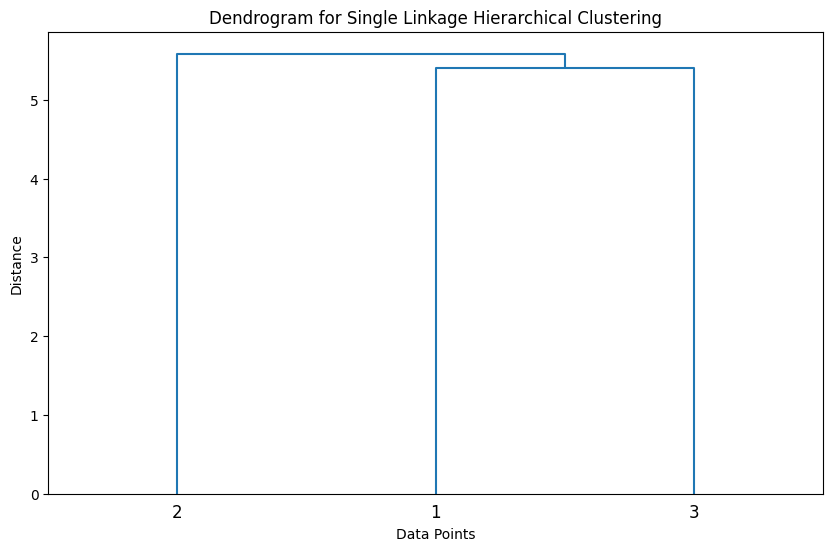

In [ ]:
import scipy.cluster.hierarchy as sch

s_linkage_matrix = sch.linkage(single_linkage_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(s_linkage_matrix, labels=['1', '2', '3'], color_threshold=0)
plt.title('Dendrogram for Single Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

/var/folders/_2/0wh94zd11cj6smgr_57jgfyc0000gn/T/ipykernel_2219/2065308417.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  a_linkage_matrix = sch.linkage(average_linkage_matrix, method='single')


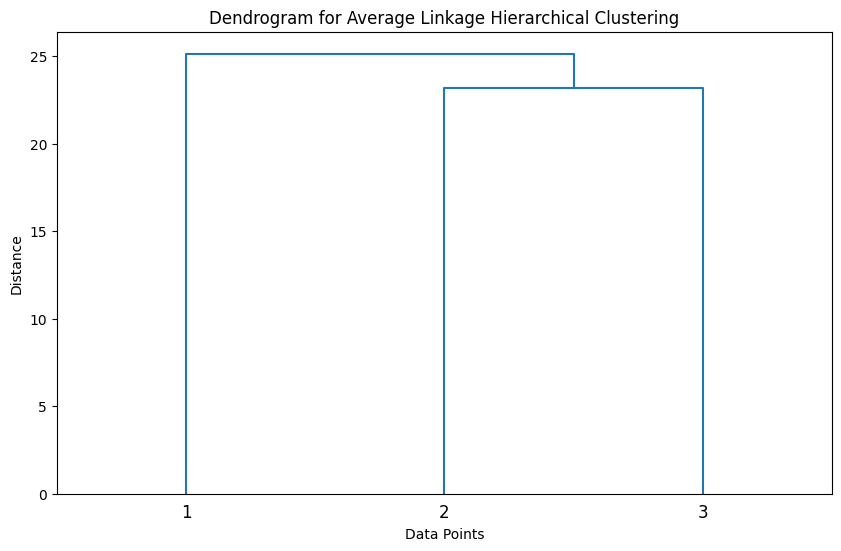

In [28]:
a_linkage_matrix = sch.linkage(average_linkage_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(a_linkage_matrix, labels=['1', '2', '3'], color_threshold=0)
plt.title('Dendrogram for Average Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

/var/folders/_2/0wh94zd11cj6smgr_57jgfyc0000gn/T/ipykernel_2219/45118942.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  c_linkage_matrix = sch.linkage(complete_linkage_matrix, method='single')


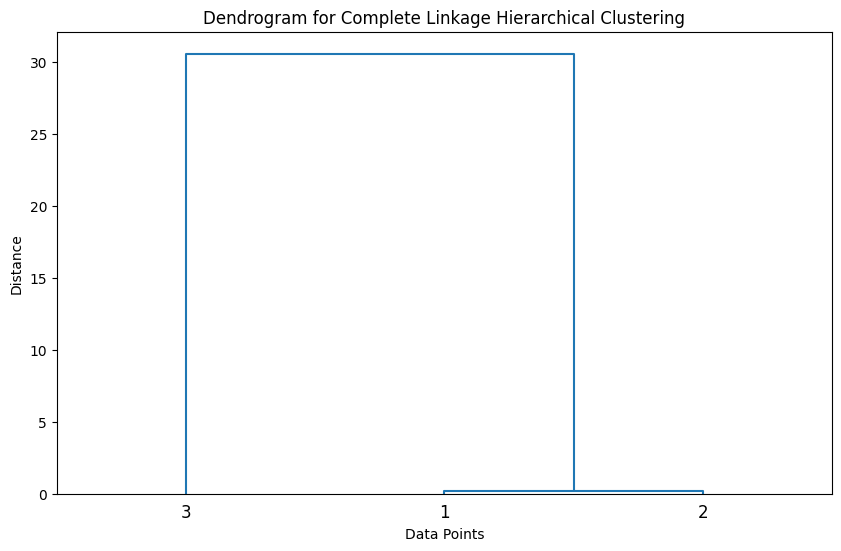

In [ ]:
c_linkage_matrix = sch.linkage(complete_linkage_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(c_linkage_matrix, labels=['1', '2', '3'], color_threshold=0)
plt.title('Dendrogram for Complete Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

/var/folders/_2/0wh94zd11cj6smgr_57jgfyc0000gn/T/ipykernel_2219/924249650.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cen_linkage_matrix = sch.linkage(centroid_linkage_matrix, method='single')


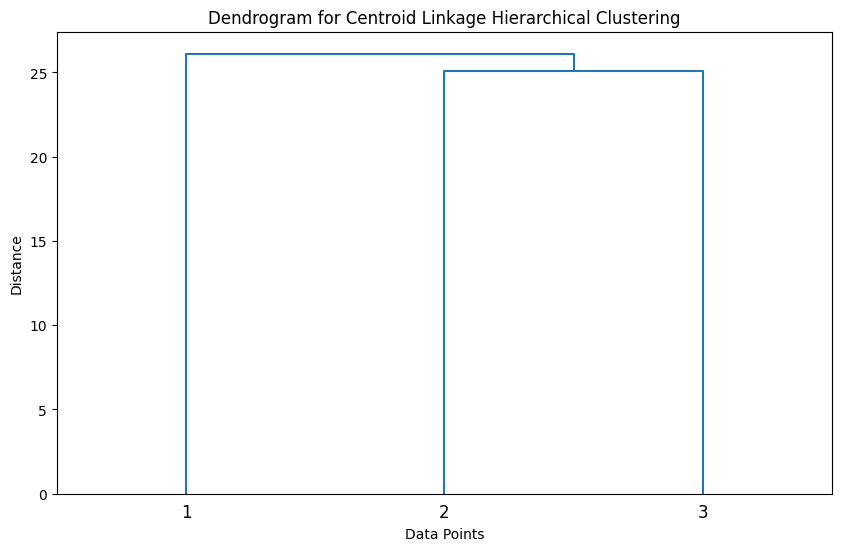

In [30]:
cen_linkage_matrix = sch.linkage(centroid_linkage_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(cen_linkage_matrix, labels=['1', '2', '3'], color_threshold=0)
plt.title('Dendrogram for Centroid Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()